
### M2_SII_23_24:
<center><h1>TP2 RCR2:</h1></center>
<center><h2>Controlleur flou</h2></center>
---
FERKOU SARAH - KHEMISSI MAROUA



In [ ]:
!pip install fuzzylogic 

In [ ]:
from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.functions import trapezoid, triangular
import matplotlib.pyplot as plt
import numpy as np

# Initialisation des E/S

In [ ]:
# Premier controleur d'entrée
PM = Domain('Puissance Reactive mesure', -100, 120)

# Deuxieme controleur d'entrée
NT = Domain('Niveau de Tension', -13, 15)

# Troisième controleur de sortie
PA = Domain('Puissance Reactive adaptee', -110, 90)

# Fuzification

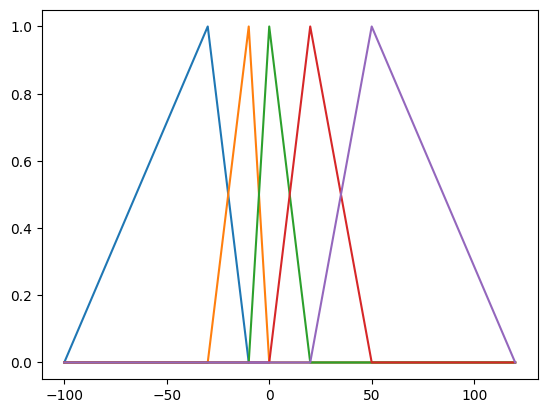

In [ ]:
# Paramètres d'entrée PM
PM.NG = trapezoid(-100, -30, -30, -10)
PM.NP = trapezoid(-30, -10, -10, 0)
PM.EZ = trapezoid(-10, 0, 0, 20)
PM.PP = trapezoid(0, 20, 20, 50)
PM.PG = trapezoid(20, 50, 50, 120)
PM.NG.plot()
PM.NP.plot()
PM.EZ.plot()
PM.PP.plot()
PM.PG.plot()

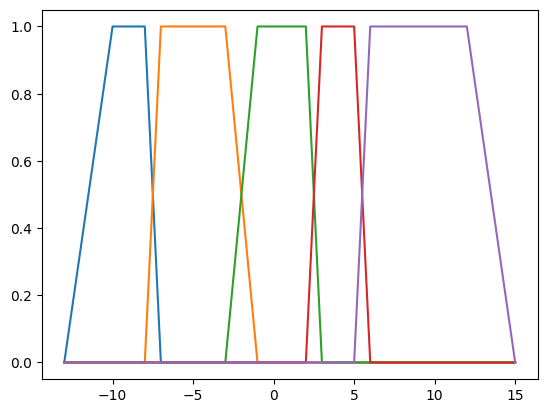

In [ ]:
# Paramètres d'entrée NT
NT.Vmiad = trapezoid(-13, -10, -8, -7)
NT.Vmid = trapezoid(-8, -7, -3, -1)
NT.EZ = trapezoid(-3, -1, 2, 3)
NT.Vmxd = trapezoid(2, 3, 5, 6)
NT.Vmxad = trapezoid(5, 6, 12, 15)
NT.Vmiad.plot()
NT.Vmid.plot()
NT.EZ.plot()
NT.Vmxd.plot()
NT.Vmxad.plot()

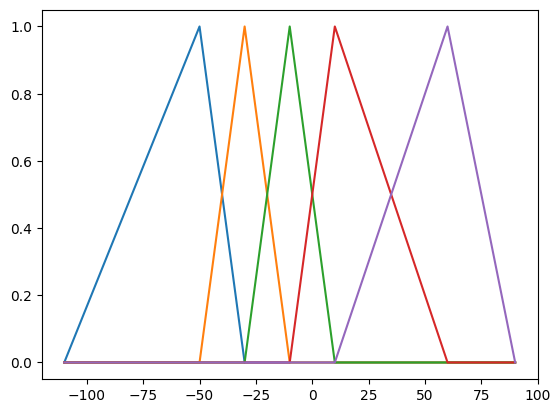

In [ ]:
# Paramètres de sortiee PA
PA.NG = trapezoid(-110, -50, -50, -30)
PA.NP = trapezoid(-50, -30, -30, -10)
PA.EZ = trapezoid(-30, -10, -10, 10)
PA.PP = trapezoid(-10, 10, 10, 60)
PA.PG = trapezoid(10, 60, 60, 90)
PA.NG.plot()
PA.NP.plot()
PA.EZ.plot()
PA.PP.plot()
PA.PG.plot()

# Regles

In [ ]:
# initialisation des regles de notre systeme
rules = Rule({
    (NT.Vmiad, PM.PG): PA.PG,# R1
    (NT.Vmiad, PM.PP): PA.PG,# R2
    (NT.Vmiad, PM.EZ): PA.PP,# R3
    (NT.Vmiad, PM.NP): PA.PG,# R4
    (NT.Vmiad, PM.NG): PA.PG,# R5
    (NT.Vmid, PM.PG): PA.PG,# R6
    (NT.Vmid, PM.PP): PA.PP,# R7
    (NT.Vmid, PM.EZ): PA.EZ,# R8
    (NT.Vmid, PM.NP): PA.PP,# R9
    (NT.Vmid, PM.NG): PA.PG,# R10
    (NT.EZ, PM.PG): PA.PP,# R11
    (NT.EZ, PM.PP): PA.EZ,# R12
    (NT.EZ, PM.EZ): PA.EZ,# R13
    (NT.EZ, PM.NP): PA.EZ,# R14
    (NT.EZ, PM.NG): PA.PP,# R15
    (NT.Vmxd, PM.PG): PA.NG,# R16
    (NT.Vmxd, PM.PP): PA.NP,# R17
    (NT.Vmxd, PM.EZ): PA.EZ,# R18
    (NT.Vmxd, PM.NP): PA.NP,# R19
    (NT.Vmxd, PM.NG): PA.NG,# R20
    (NT.Vmxad, PM.PG): PA.NG,# R21
    (NT.Vmxad, PM.PP): PA.NG,# R22
    (NT.Vmxad, PM.EZ): PA.NP,# R23
    (NT.Vmxad, PM.NP): PA.NG, # R24
    (NT.Vmxad, PM.NG): PA.NG # R25
})

# Application

In [ ]:
# On récupère les pourcentages d'appartenances de nos controleurs d'entrée selon leur valeur
pm_output = list(PM(-25).values())
pm_output = [float(x) for x in pm_output]

nt_output = list(NT(-2.5).values())
nt_output = [float(x) for x in nt_output]

# On applique les régles d'inférence de mandanie
pa_ng = max(
                min(pm_output[3], nt_output[3]),
                min(pm_output[4], nt_output[3]),
                min(pm_output[0], nt_output[4]),
                min(pm_output[1], nt_output[4]),
                min(pm_output[3], nt_output[4]),
                min(pm_output[4], nt_output[4])
                )

pa_np = max(
                min(pm_output[1], nt_output[3]),
                min(pm_output[3], nt_output[3]),
                min(pm_output[2], nt_output[4])
                )

pa_ez = max(
                min(pm_output[2], nt_output[1]),
                min(pm_output[1], nt_output[2]),
                min(pm_output[2], nt_output[2]),
                min(pm_output[3], nt_output[2]),
                min(pm_output[2], nt_output[3])
                )

pa_pp = max(
                min(pm_output[2], nt_output[0]),
                min(pm_output[2], nt_output[1]),
                min(pm_output[2], nt_output[0]),
                min(pm_output[3], nt_output[2]),
                min(pm_output[0], nt_output[2])
                )



pa_pg = max(
                min(pm_output[0], nt_output[0]),
                min(pm_output[1], nt_output[0]),
                min(pm_output[3], nt_output[0]),
                min(pm_output[4], nt_output[0]),
                min(pm_output[0], nt_output[1]),
                min(pm_output[4], nt_output[1])
                )
all_values = [pa_ng, pa_np, pa_ez, pa_pp, pa_pg] 

print(f"Puissance reactive adapte Vegative Grande {pa_ng}\nNegative Petite {pa_np}\nEnvers Zero {pa_ez}\nPositive Petite {pa_pp}\nPositive Grande {pa_pg}")

Puissance reactive adapte Vegative Grande 0.0
Negative Petite 0.0
Envers Zero 0.25
Positive Petite 0.25
Positive Grande 0.75


# Defuzzification

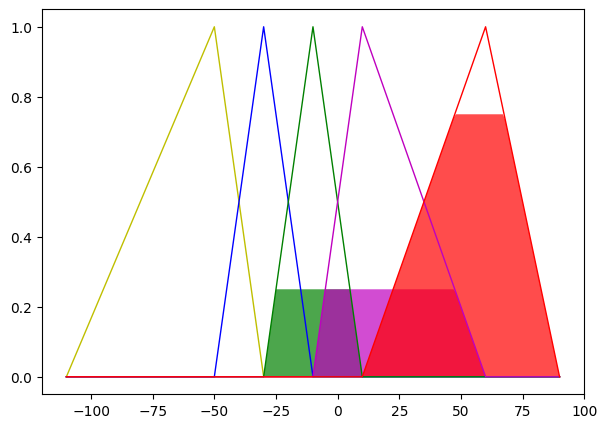

In [ ]:
fig, axis = plt.subplots(figsize=(7, 5))

x_PA = PA.range

PA_0 = np.zeros_like(x_PA)
parametres_PA = [PA.NG, PA.NP, PA.EZ, PA.PP, PA.PG]
j=0
colors = ['y', 'b', 'g', 'm', 'r']
for each in parametres_PA:
    axis.plot(x_PA, each.array(), colors[j], linewidth=1)
    axis.fill_between(x_PA, PA_0, [min(all_values[j], x) for x in each.array()], facecolor=colors[j], alpha=0.7)
    j+=1

In [ ]:
values = {PM: -25, NT: -2.5}
centre_de_gravite = rules(values)
print(f"Centre de gravite obtenu avec les valeurs PM = -25, NT = -2.5 est egale a : {centre_de_gravite}")

Centre de gravite obtenu avec les valeurs PM = -25, NT = -2.5 est egale a : 30.96185737976782
